<a href="https://colab.research.google.com/github/Chenyuju/chen/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated regression coefficients: [[ 1.55825984 -2.31520778 -0.53856716]]
No. of iterations: 159
Correctly predicted labels: 185
18500


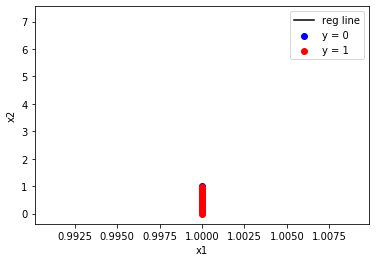

In [38]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def loadCSV(filename): 
    with open(filename,"r") as csvfile: 
        lines = csv.reader(csvfile) 
        dataset = list(lines) 
        for i in range(len(dataset)): 
            dataset[i] = [float(x) for x in dataset[i]]      
    return np.array(dataset) 

def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 

def sigmoid_function(beta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 

def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = sigmoid_function(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 

def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = sigmoid_function(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 

def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter  

def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = sigmoid_function(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 

def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    #x1 = np.arange(0, 3, 0.2) 
    x1 = np.linspace(X[:,[0]].min(), X[:,[0]].max(), 100)
    x2 = (-beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    #x2 = np.linspace(X[:,[1]].min(), X[:,[1]].max(), 100)
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 

if __name__ == "__main__": 
    # load the dataset 
    dataset = loadCSV('/content/sample_data/dataset4.csv') 
      
    # normalizing feature matrix 
    X = normalize(dataset[:, :-1]) 
      
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
  
    # response vector 
    y = dataset[:, -1] 
  
    # initial beta values 
    beta = np.matrix(np.zeros(X.shape[1])) 
  
    # beta values after running gradient descent 
    beta, num_iter = grad_desc(X, y, beta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", beta) 
    print("No. of iterations:", num_iter) 
  
    # predicted labels 
    y_pred = pred_values(beta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 

    accuracy = (y_pred == y).sum() 
    print(accuracy*100) 
    # plotting regression line 
    plot_reg(X, y, beta) 

Logistic Regression

1) logistic/sigmoid function
 sigmoid(x) = 1/(1+e^x)

2) cost function
  cost(beta) = -[y*log(sigmoid(x)) + (1-y)*log(1-sigmoid(x))]

3) gradient descent
  grad(beta) = grad(beta) - alpha(sigmoid(x) - y) * x

cost function for y
 cost(sigmoid(x),1) = -log(sigmoid(x))
 cost(sigmoid(x),0) = -log(1-sigmoid(x))

In [379]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/sample_data/g_h_w.csv")

#X = data[["age", "chol"]]
X = data[["height", "weight"]]

#Y = data[["target"]].values
Y = data[["sex"]].values

In [22]:
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)
print(X.shape)

(10000, 2)


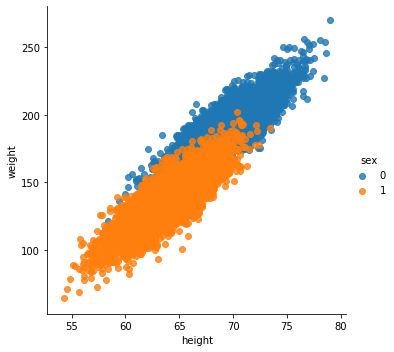

In [23]:
import seaborn as sns

#sns.lmplot('age', 'chol', data, hue='target', fit_reg=False)
sns.lmplot('height', 'weight', data, hue='sex', fit_reg=False)

plt.show()

In [0]:
(predict, observe) = X.shape
beta  = np.zeros((observe+1, 1))
ones = np.ones((predict, 1))

X = np.hstack((ones, X))

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [0]:
def sigmoid_function(x):
  return 1/(1+np.exp(-x))

In [0]:
def cost_function(beta, X_train, Y_train):
  sig =sigmoid_function(X_train)

  C = -(np.sum(np.multiply(Y_train, np.log(sig))
  + np.multiply((1-Y_train), np.log(1-sig))))
  return C

In [0]:
iterations = 100
alpha = 0.01

def gradient_descent(X_train, Y_train, beta, alpha, iterations):
  for _ in range(iterations):
    sig = sigmoid_function(X_train @ beta)
    beta = beta - (alpha* X_train.T @ (sig - Y_train))
  return beta

In [31]:
beta = gradient_descent(X_train, Y_train, beta, alpha, iterations)

C = cost_function(beta, X_train, Y_train)
print(C)

25403.893276115872


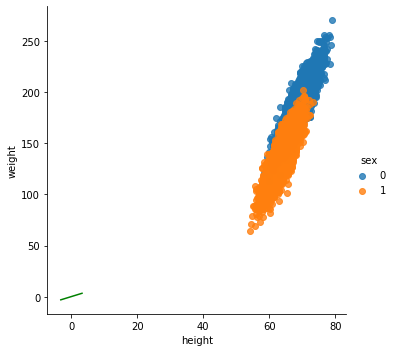

In [32]:
x1_vals = np.linspace(X_train[:,[1]].min(), X_train[:,[1]].max(), iterations)
#x2_vals = (-beta[0, 0] - (beta[1, 0] * x1_vals)) / beta[2, 0]
x2_vals = np.linspace(X_train[:,[2]].min(), X_train[:,[2]].max(), iterations)

#sns.lmplot('age', 'chol', data, hue='target', fit_reg=False)
sns.lmplot('height', 'weight', data, hue='sex', fit_reg=False)


plt.plot(x1_vals, x2_vals,color='green')
plt.show()

In [0]:
def predict_value(X_train, beta):
  return sigmoid_function(X_train @ beta) >= 0.5

In [17]:
pred = predict_value(X_train, beta)
accuracy = (pred == Y_train).sum() / train_samples
accuracy_p = accuracy*100

print("Accuracy of Logistic Regression : ", accuracy_p)

Accuracy of Logistic Regression :  87.6


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

print('Accuracy of Logistic Regression : {:.2f} \n'.format(classifier.score(X_train, Y_train)))

'''
cnf_matrix = confusion_matrix(X_train, Y_train)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

'''#confusion_matrix = confusion_matrix(X_train, Y_train)
#print(confusion_matrix)

Accuracy of Logistic Regression : 0.92 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'\ncnf_matrix = confusion_matrix(X_train, Y_train)\n\nclass_names=[0,1] # name  of classes\nfig, ax = plt.subplots()\ntick_marks = np.arange(len(class_names))\nplt.xticks(tick_marks, class_names)\nplt.yticks(tick_marks, class_names)\n\nsns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt=\'g\')\nax.xaxis.set_label_position("top")\nplt.tight_layout()\nplt.title(\'Confusion matrix\', y=1.1)\nplt.ylabel(\'Actual label\')\nplt.xlabel(\'Predicted label\')\n\n'

In [0]:
def predict_test(X_test, beta):
  return sigmoid_function(X_test @ beta)

In [14]:
example1 = np.array([44, 226, 1])
example0 = np.array([62, 267, 0])

hypothesis = sigmoid_function(example1)

print(hypothesis[2])

0.7310585786300049


In [367]:
import math
import numpy
from activation_functions import sigmoid, sigmoid_prime

def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

def cost_function(features, labels, weights):
    observations = len(labels)
    predictions = predict(features, weights)

    class1_cost = -labels*np.log(predictions)
    class2_cost = (1-labels)*np.log(1-predictions)

    cost = class1_cost - class2_cost

    cost = cost.sum() / observations
    return cost

def update_weights(features, labels, weights, lr):
    N = len(features)
    predictions = predict(features, weights)

    return weights


def decision_boundary(prob):
  return 1 if prob >= .5 else 0


def classify(predictions):

def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        if i % 1000 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history


def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))


def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

ModuleNotFoundError: ignored